## COMPETITION LINK 
https://www.kaggle.com/c/tabular-playground-series-nov-2021/overview
### My kaggle account https://www.kaggle.com/jokkojja

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.svm import LinearSVC # faster then SVC
import multiprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
MAX_CORE_COUNT = multiprocessing.cpu_count()

# DATA EXPROLATION

In [8]:
train = pd.read_csv('tabular-playground-series-nov-2021/train.csv')
test = pd.read_csv('tabular-playground-series-nov-2021/test.csv')

In [9]:
print(f'train shape -  {train.shape}')
train.head()

train shape -  (600000, 102)


,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
0,0,0.106643,3.59437,132.8040,3.18428,0.081971,1.18859,3.73238,2.266270,2.09959,...,1.09862,0.013331,-0.011715,0.052759,0.065400,4.211250,1.97877,0.085974,0.240496,0
1,1,0.125021,1.67336,76.5336,3.37825,0.099400,5.09366,1.27562,-0.471318,4.54594,...,3.46017,0.017054,0.124863,0.154064,0.606848,-0.267928,2.57786,-0.020877,0.024719,0
2,2,0.036330,1.49747,233.5460,2.19435,0.026914,3.12694,5.05687,3.849460,1.80187,...,4.88300,0.085222,0.032396,0.116092,-0.001688,-0.520069,2.14112,0.124464,0.148209,0
3,3,-0.014077,0.24600,779.9670,1.89064,0.006948,1.53112,2.69800,4.517330,4.50332,...,3.47439,-0.017103,-0.008100,0.062013,0.041193,0.511657,1.96860,0.040017,0.044873,0
4,4,-0.003259,3.71542,156.1280,2.14772,0.018284,2.09859,4.15492,-0.038236,3.37145,...,1.91059,-0.042943,0.105616,0.125072,0.037509,1.043790,1.07481,-0.012819,0.072798,1


We have train dataset with 102 rows and 600000 columns

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,600000.0,299999.500000,173205.225094,0.00000,149999.750000,299999.500000,449999.250000,599999.00000
f0,600000.0,0.306508,0.522450,-3.79745,0.026222,0.097788,0.397184,8.78150
f1,600000.0,2.497590,1.554018,-1.22396,1.186237,2.516500,3.787630,6.22672
f2,600000.0,306.644536,551.743893,-1842.53000,43.573400,133.626000,302.262250,6119.28000
f3,600000.0,2.647901,1.544529,-1.36856,1.442028,2.634130,3.907640,6.52115
...,...,...,...,...,...,...,...,...
f96,600000.0,2.547853,1.558427,-1.58474,1.247888,2.601940,3.820665,6.25436
f97,600000.0,2.590159,1.525091,-1.25473,1.348078,2.682090,3.839520,6.14530
f98,600000.0,0.158881,0.436190,-3.99350,0.013536,0.058058,0.110718,10.76700
f99,600000.0,0.123048,0.264896,-2.78338,0.018105,0.058471,0.104872,5.98811


Huge std, need to scale data.

In [11]:
train.isna().sum().unique() # not nan

array([0])

Not nan values in train

In [12]:
train.target.unique() # binary classification

array([0, 1])

binary classification

/Users/jokkojja/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


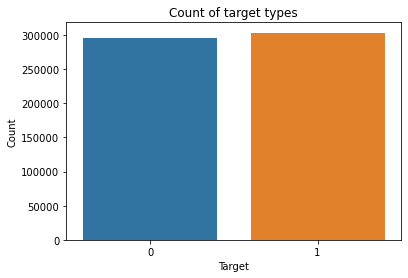

In [13]:
sns.countplot(train.target) 
plt.title('Count of target types')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

Train is balanced dataset

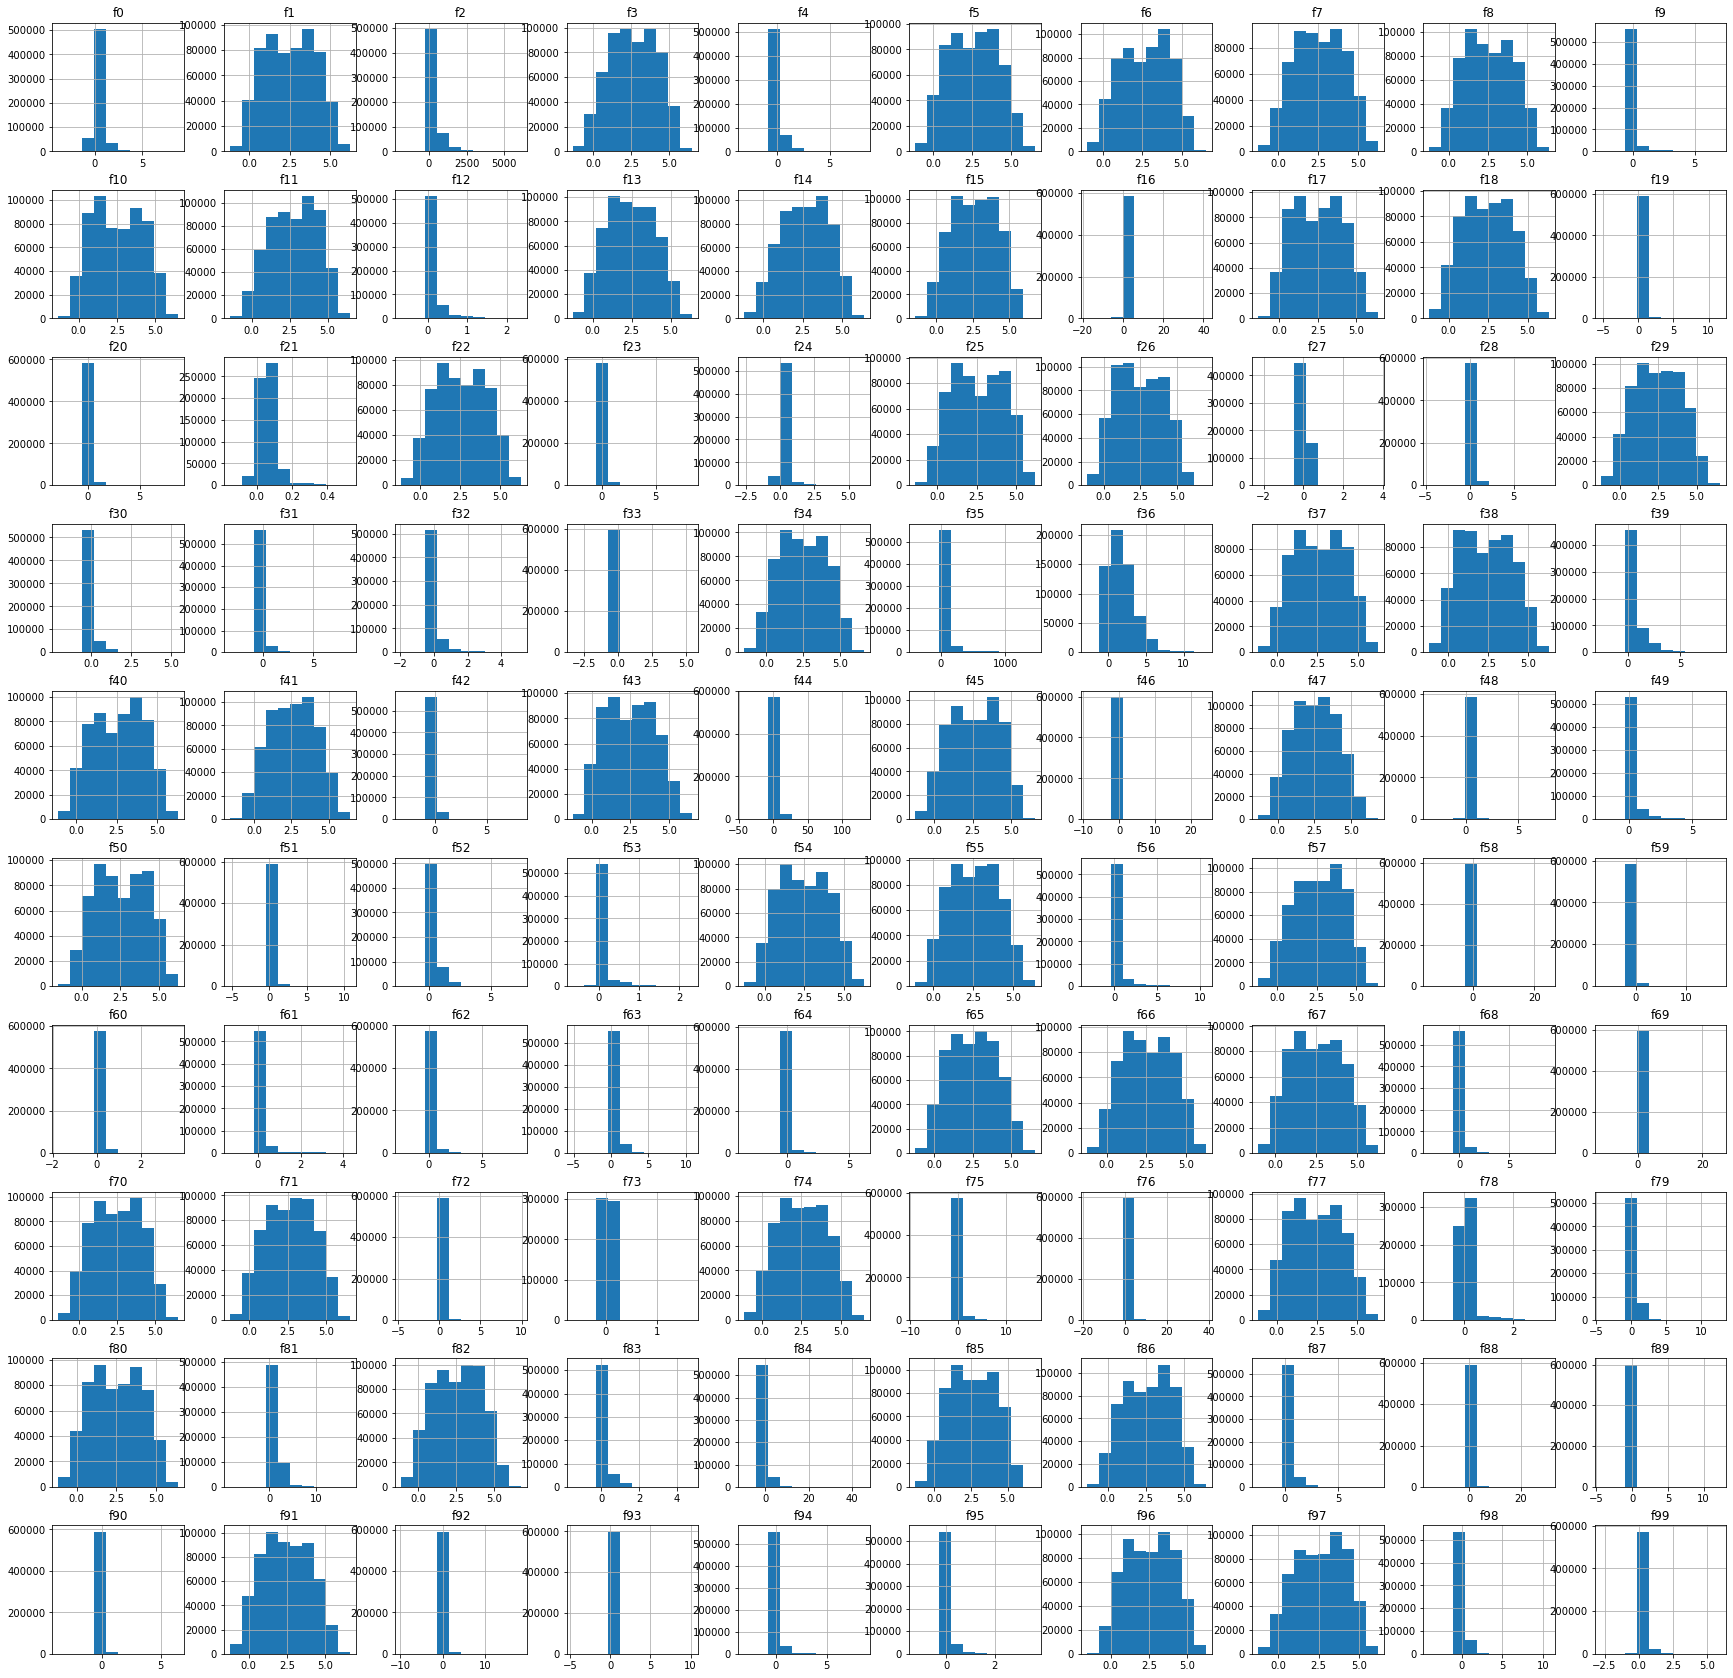

In [14]:
train.drop(['id', 'target'], axis = 1).hist(figsize = (30, 30)) 
plt.show()

Bimodal distribution and many outliers

<AxesSubplot:>

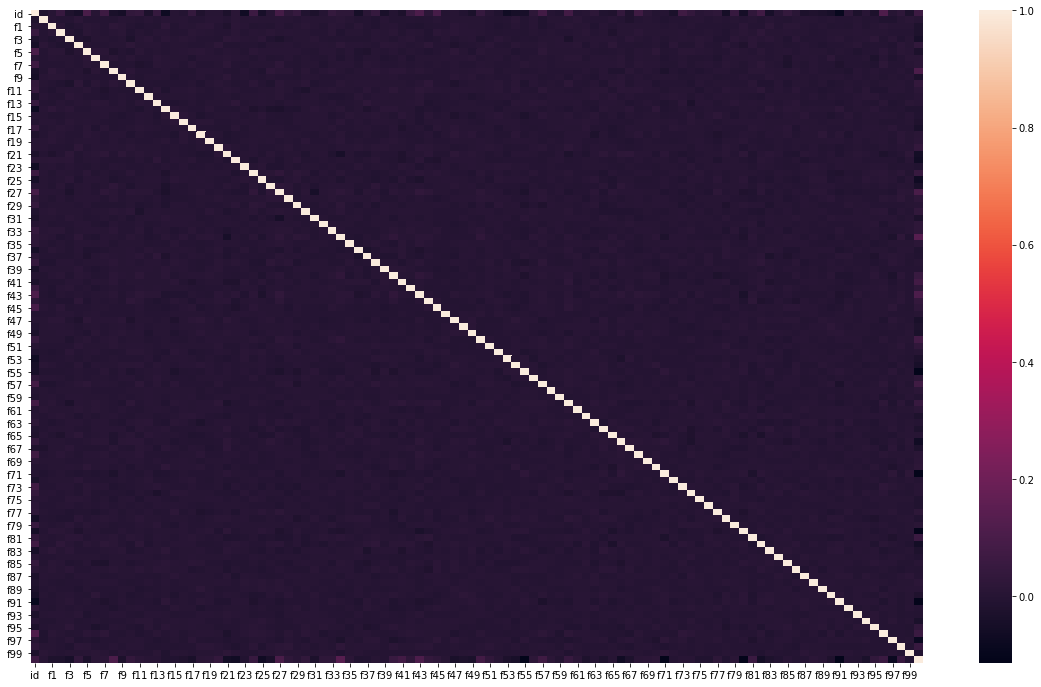

In [15]:
plt.figure(figsize = (20, 12))
sns.heatmap(train.corr(), annot = False) 

Not medium or strong correlation

# BASELINE

In [16]:
X = train.drop(['id', 'target'], axis = 1)
y = train.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [18]:
# sc = dabl.SimpleClassifier().fit(X_train, y_train)
# sc.score(X_test, y_test)
# sc.log_
simple_clf = DecisionTreeClassifier()
baseline = np.mean(cross_val_score(simple_clf, X_train, y_train, scoring = 'roc_auc', n_jobs = MAX_CORE_COUNT))
#score of simple classifier without tuning

In [19]:
print(f'roc auc score baseline - {baseline}')

roc auc score baseline - 0.5517265092369377


Make a baseline prediction. Use simple model without tuning. Score - mean roc auc score 0.5517265092369377

# MODELING

## RandomForestClassifier

In [20]:
rndf_clf = RandomForestClassifier()
standart_pipeline = Pipeline([('standart_scaler', StandardScaler()), ('model', rndf_clf)])
minmax_pipeline = Pipeline([('min_max_scaler', MinMaxScaler()), ('model', rndf_clf)])

I decided to use pipelines with 2 type of scalers. Min max scaler and standart scaler

In [21]:
rndf_clf_pipeline_dict = {
    'standart' : standart_pipeline,
    'min_max' : minmax_pipeline
}
random_forest_score_list = {}

In [101]:
def model_cross_val_score(my_pipeline_dict):
    """Function for calculating mean cross validation roc auc score for my pipelines"""
    for key, pipe in my_pipeline_dict.items():
        cv_scores = np.mean(cross_val_score(pipe,X_train, y_train, scoring = 'roc_auc', n_jobs = MAX_CORE_COUNT))
        print(f"mean roc auc score: {cv_scores}, for scaler {key}")

In [23]:
model_cross_val_score(rndf_clf_pipeline_dict) 
# StandardScaler, MinMaxScaler
# would like 4 scalers(StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer)
# but training is so long

mean roc auc score: 0.704036685251504, for scaler standart
mean roc auc score: 0.7052146567669524, for scaler min_max


## GradientBoostingClassifier

In [ ]:
grad_boost_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, loss = 'deviance',\
                                           criterion = 'mse')
standart_pipeline = Pipeline([('standart_scaler', StandardScaler()), ('model', grad_boost_clf)])
minmax_pipeline = Pipeline([('min_max_scaler', MinMaxScaler()), ('model', grad_boost_clf)])

In [ ]:
grad_boost_clf_pipeline_dict = {
    'standart' : standart_pipeline,
    'min_max' : minmax_pipeline
}
grad_boost_score_list = {}

In [ ]:
#bad score
model_cross_val_score(grad_boost_clf_pipeline_dict) 
# StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer

## KNeighborsClassifier

In [ ]:
k_neigh_clf = KNeighborsClassifier()
standart_pipeline = Pipeline([('standart_scaler', StandardScaler()), ('model', k_neigh_clf)])
minmax_pipeline = Pipeline([('min_max_scaler', MinMaxScaler()), ('model', k_neigh_clf)])

In [ ]:
k_neigh_clf_pipeline_dict = {
    'standart' : standart_pipeline,
    'min_max' : minmax_pipeline
}
k_neigh_score_list = {}

In [ ]:
model_cross_val_score(k_neigh_clf_pipeline_dict) 
#very slow

## LogisticRegression

In [24]:
log_reg_clf = LogisticRegression()
standart_pipeline = Pipeline([('standart_scaler', StandardScaler()), ('model', log_reg_clf)])
minmax_pipeline = Pipeline([('min_max_scaler', MinMaxScaler()), ('model', log_reg_clf)])

In [25]:
log_reg_clf_pipeline_dict = {
    'standart' : standart_pipeline,
    'min_max' : minmax_pipeline
}
log_reg_clf_score_list = {}

In [26]:
model_cross_val_score(log_reg_clf_pipeline_dict) 
#best score for standart scaler

mean roc auc score: 0.7489184367867202, for scaler standart
mean roc auc score: 0.7483900889801646, for scaler min_max


## GaussianNB 

In [27]:
gauss_clf = GaussianNB()
standart_pipeline = Pipeline([('standart_scaler', StandardScaler()), ('model', gauss_clf)])
minmax_pipeline = Pipeline([('min_max_scaler', MinMaxScaler()), ('model', gauss_clf)])

In [28]:
gauss_clf_pipeline_dict = {
    'standart' : standart_pipeline,
    'min_max' : minmax_pipeline    
}
gauss_clf_score_list = {}

In [29]:
model_cross_val_score(gauss_clf_pipeline_dict) 
# so bad

mean roc auc score: 0.6354743457959554, for scaler standart
mean roc auc score: 0.6354756171295439, for scaler min_max


## SVC

In [30]:
svc_clf = LinearSVC(max_iter=4000)
standart_pipeline = Pipeline([('standart_scaler', StandardScaler()), ('model', svc_clf)])
minmax_pipeline = Pipeline([('min_max_scaler', MinMaxScaler()), ('model', svc_clf)])

In [31]:
svc_clf_pipeline_dict = {
    'standart' : standart_pipeline,
    'min_max' : minmax_pipeline    
}
svc_clf_score_list = {}

In [32]:
model_cross_val_score(svc_clf_pipeline_dict) 

mean roc auc score: 0.7488638378953519, for scaler standart
mean roc auc score: 0.7488783963952846, for scaler min_max


Logistic regression with standart scaler is the best. KNeighborsClassifier is very slow, I'll comment the cell

# TUNING

Need to tune hyperparametrs for best model to get the best score.

In [35]:
scaler = StandardScaler()

In [36]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
model = LogisticRegression()
params = {'max_iter' : range(1000, 12000, 1000), 'C' : np.arange(0.2, 2, 0.2), \
         'n_jobs' : [MAX_CORE_COUNT]}

In [76]:
grid = GridSearchCV(model, params, cv = 5, scoring='roc_auc', verbose = 3)

In [77]:
grid.fit(X_train, y_train)
#tried to tune solver but got an error

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................C=0.2, max_iter=1000, n_jobs=4; total time=  17.0s
[CV 2/5] END .................C=0.2, max_iter=1000, n_jobs=4; total time=  11.6s
[CV 3/5] END .................C=0.2, max_iter=1000, n_jobs=4; total time=  10.3s
[CV 4/5] END .................C=0.2, max_iter=1000, n_jobs=4; total time=  10.1s
[CV 5/5] END .................C=0.2, max_iter=1000, n_jobs=4; total time=   9.3s
[CV 1/5] END .................C=0.2, max_iter=2000, n_jobs=4; total time=  13.9s
[CV 2/5] END .................C=0.2, max_iter=2000, n_jobs=4; total time=  13.5s
[CV 3/5] END .................C=0.2, max_iter=2000, n_jobs=4; total time=  10.7s
[CV 4/5] END .................C=0.2, max_iter=2000, n_jobs=4; total time=  11.0s
[CV 5/5] END .................C=0.2, max_iter=2000, n_jobs=4; total time=  10.6s
[CV 1/5] END .................C=0.2, max_iter=3000, n_jobs=4; total time=  10.5s
[CV 2/5] END .................C=0.2, max_iter=3

[CV 2/5] END ................C=0.4, max_iter=10000, n_jobs=4; total time=  10.8s
[CV 3/5] END ................C=0.4, max_iter=10000, n_jobs=4; total time=  10.4s
[CV 4/5] END ................C=0.4, max_iter=10000, n_jobs=4; total time=  10.4s
[CV 5/5] END ................C=0.4, max_iter=10000, n_jobs=4; total time=  10.8s
[CV 1/5] END ................C=0.4, max_iter=11000, n_jobs=4; total time=  11.2s
[CV 2/5] END ................C=0.4, max_iter=11000, n_jobs=4; total time=  11.1s
[CV 3/5] END ................C=0.4, max_iter=11000, n_jobs=4; total time=  10.8s
[CV 4/5] END ................C=0.4, max_iter=11000, n_jobs=4; total time=  10.8s
[CV 5/5] END ................C=0.4, max_iter=11000, n_jobs=4; total time=  11.3s
[CV 1/5] END ..C=0.6000000000000001, max_iter=1000, n_jobs=4; total time=  10.9s
[CV 2/5] END ..C=0.6000000000000001, max_iter=1000, n_jobs=4; total time=  10.3s
[CV 3/5] END ..C=0.6000000000000001, max_iter=1000, n_jobs=4; total time=  11.2s
[CV 4/5] END ..C=0.600000000

[CV 4/5] END .................C=0.8, max_iter=8000, n_jobs=4; total time=  10.2s
[CV 5/5] END .................C=0.8, max_iter=8000, n_jobs=4; total time=  10.6s
[CV 1/5] END .................C=0.8, max_iter=9000, n_jobs=4; total time=  10.1s
[CV 2/5] END .................C=0.8, max_iter=9000, n_jobs=4; total time=  10.1s
[CV 3/5] END .................C=0.8, max_iter=9000, n_jobs=4; total time=  10.5s
[CV 4/5] END .................C=0.8, max_iter=9000, n_jobs=4; total time=  10.7s
[CV 5/5] END .................C=0.8, max_iter=9000, n_jobs=4; total time=  10.3s
[CV 1/5] END ................C=0.8, max_iter=10000, n_jobs=4; total time=  10.6s
[CV 2/5] END ................C=0.8, max_iter=10000, n_jobs=4; total time=  10.3s
[CV 3/5] END ................C=0.8, max_iter=10000, n_jobs=4; total time=  10.2s
[CV 4/5] END ................C=0.8, max_iter=10000, n_jobs=4; total time=  10.7s
[CV 5/5] END ................C=0.8, max_iter=10000, n_jobs=4; total time=  10.8s
[CV 1/5] END ...............

[CV 1/5] END .................C=1.2, max_iter=7000, n_jobs=4; total time=  11.3s
[CV 2/5] END .................C=1.2, max_iter=7000, n_jobs=4; total time=  11.3s
[CV 3/5] END .................C=1.2, max_iter=7000, n_jobs=4; total time=  10.7s
[CV 4/5] END .................C=1.2, max_iter=7000, n_jobs=4; total time=  10.8s
[CV 5/5] END .................C=1.2, max_iter=7000, n_jobs=4; total time=  10.6s
[CV 1/5] END .................C=1.2, max_iter=8000, n_jobs=4; total time=  11.6s
[CV 2/5] END .................C=1.2, max_iter=8000, n_jobs=4; total time=  11.2s
[CV 3/5] END .................C=1.2, max_iter=8000, n_jobs=4; total time=  10.8s
[CV 4/5] END .................C=1.2, max_iter=8000, n_jobs=4; total time=  11.0s
[CV 5/5] END .................C=1.2, max_iter=8000, n_jobs=4; total time=  11.0s
[CV 1/5] END .................C=1.2, max_iter=9000, n_jobs=4; total time=  11.1s
[CV 2/5] END .................C=1.2, max_iter=9000, n_jobs=4; total time=  10.6s
[CV 3/5] END ...............

[CV 3/5] END .................C=1.6, max_iter=5000, n_jobs=4; total time=  10.8s
[CV 4/5] END .................C=1.6, max_iter=5000, n_jobs=4; total time=  10.0s
[CV 5/5] END .................C=1.6, max_iter=5000, n_jobs=4; total time=  10.2s
[CV 1/5] END .................C=1.6, max_iter=6000, n_jobs=4; total time=  10.0s
[CV 2/5] END .................C=1.6, max_iter=6000, n_jobs=4; total time=  10.4s
[CV 3/5] END .................C=1.6, max_iter=6000, n_jobs=4; total time=  10.7s
[CV 4/5] END .................C=1.6, max_iter=6000, n_jobs=4; total time=  10.3s
[CV 5/5] END .................C=1.6, max_iter=6000, n_jobs=4; total time=  10.2s
[CV 1/5] END .................C=1.6, max_iter=7000, n_jobs=4; total time=  10.2s
[CV 2/5] END .................C=1.6, max_iter=7000, n_jobs=4; total time=  10.7s
[CV 3/5] END .................C=1.6, max_iter=7000, n_jobs=4; total time=  10.0s
[CV 4/5] END .................C=1.6, max_iter=7000, n_jobs=4; total time=  10.4s
[CV 5/5] END ...............

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8]),
                         'max_iter': range(1000, 12000, 1000), 'n_jobs': [4]},
             scoring='roc_auc', verbose=3)

In [78]:
grid.best_score_

0.7489184456771679

In [85]:
grid.best_params_

{'C': 0.4, 'max_iter': 1000, 'n_jobs': 4}

In [80]:
best_model = grid.best_estimator_

In [90]:
not_need_feature = ['id', 'target']
features = [f for f in train.columns if f not in not_need_feature]

In [92]:
x_pred = test[features].values
x_pred = scaler.transform(x_pred)

In [93]:
test['target'] = best_model.predict(x_pred)

In [96]:
test[['id', 'target']].to_csv('tab_comp_log_reg_pred.csv', index = False)